
Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None


In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas
import seaborn as sns 

In [28]:
df = pandas.read_excel("Concrete_Data.xls",sheetname=0)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0,228,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0,228,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0,192,0.0,978.4,825.5,360,44.296075


Creating a covarianve Matrix from the dataset to see the interdependency of the feature vectors 

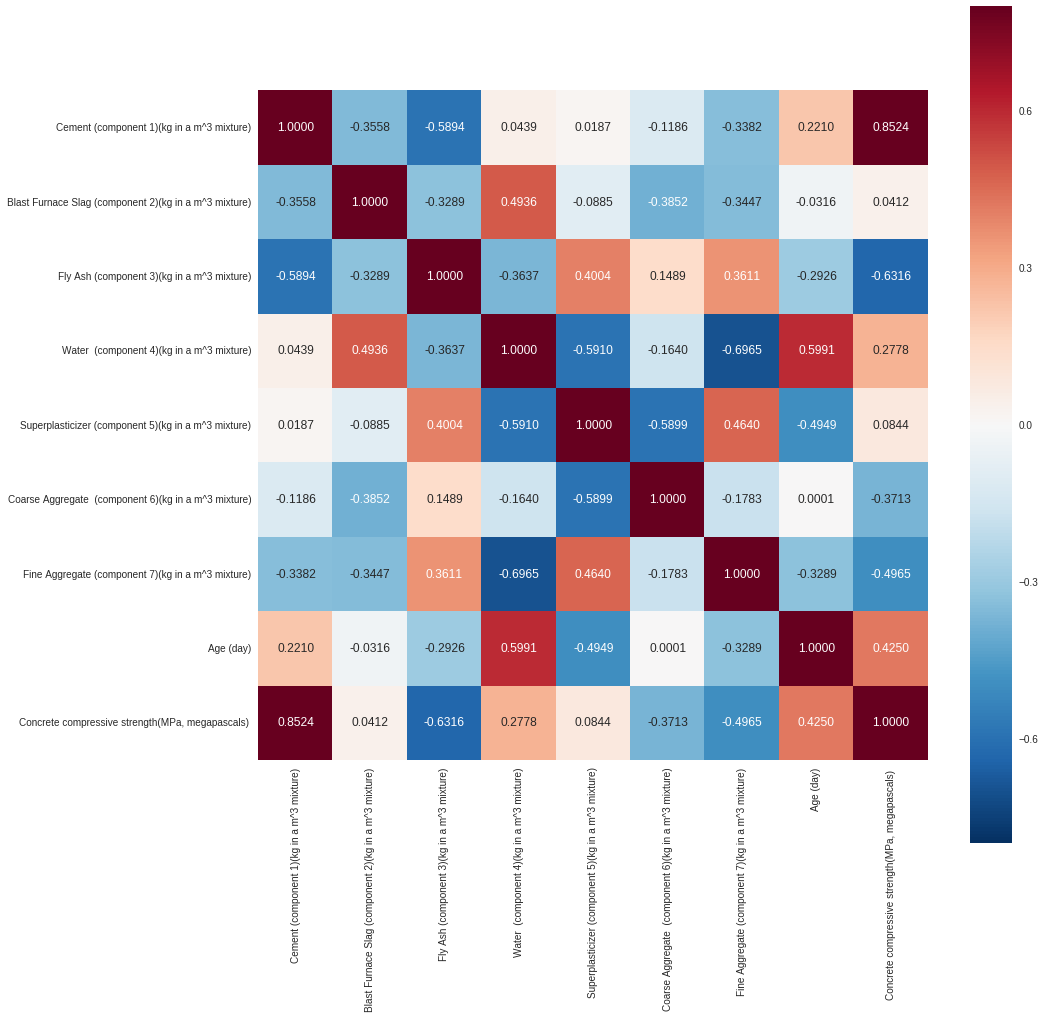

In [29]:
X = np.asarray(df)
cov_matrix = np.cov(X.T)
corr_coef = np.corrcoef(cov_matrix)
col_names =np.asarray( df.columns)
fig, ax = plt.subplots(figsize=(15,15))
# using seaborn to visualize a heatmap of the correlation coefficient matrix 
sns.heatmap(corr_coef,vmax=0.8,cbar=True, annot=True, square=True, fmt='.4f',
	annot_kws={'size':12},ax=ax,yticklabels=col_names, xticklabels=col_names)
plt.show()

As we see that the corelation of the Cement component with the concrete strenght is highly corelated , we will select Cement componet and perform a 1-d linear regression first 

In [30]:
def fit_line(x,y):
    A =x.dot(x)
    B =x.sum()
    C =y.dot(x)
    D = y.sum()
    N = x.shape[0]
    w =np.linalg.solve(np.array([[A,B],[B,N]]),np.array([C,D]))
    return w
def get_r2(y_pred,y_target):
    numerator=(np.square(y_target-y_pred)).sum()
    denominator=(np.square(y_target-y_target.mean())).sum()
    r2=1-(numerator/denominator)
    return r2

In [31]:
target_name=col_names[-1]
Y_target = df.ix[:,target_name]
col_names=np.delete(col_names,[8],axis=0)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0,228,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0,228,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0,192,0.0,978.4,825.5,360,44.296075


In [32]:
r2=[]
for item in col_names:
    x=np.asarray(df[item])
    w = fit_line(x,Y_target)
    y_pred =w[0]*x+w[1]
    r2.append(get_r2(y_pred,Y_target))
    
r2    

[0.24783741936758186,
 0.018177631008210349,
 0.01118377053623798,
 0.083875965301483113,
 0.13403089236893628,
 0.027201186158720247,
 0.02797221528395244,
 0.10816006502079267]

We will plot the data with the best possible r2 and do a 1-d linear regression

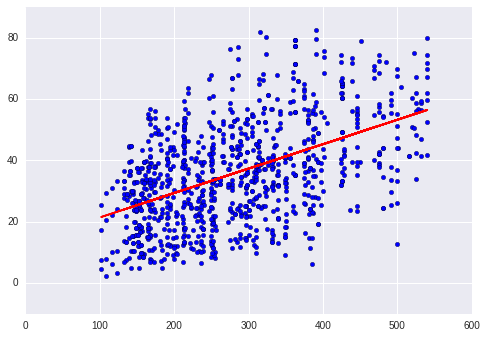

In [33]:
r2 =np.asarray(r2)
index =np.argmax(r2)
x_in =X[:,index]
W =fit_line(x_in,Y_target)
y_result = W[0]*x_in + W[1]
plt.scatter(x_in,Y_target)
plt.plot(x_in,y_result,color='red')
plt.show()

Now we will take all the data into account and do a Gradient descent and predict a final value . We will also divide our training set and test set in the ratio of 70:30

In [45]:
df = pandas.read_excel("Concrete_Data.xls",sheetname=0)
df = df.drop(target_name,1)
X_train=np.asarray(df.ix[:720,:])
X_test=np.asarray(df.ix[721:,:])
Y_train = Y_target[:721]
Y_test =Y_target[721:]
# Adding bias to the X_train & X_test
Bias1 = np.ones(X_train.shape[0]).reshape(X_train.shape[0],1)
Bias2 =np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
X_train = np.hstack((X_train , Bias1))
X_test = np.hstack((X_test , Bias2))
N = X_train.shape[0]
D = X_train.shape[1]
weights = np.random.randn(D)/np.sqrt(D)

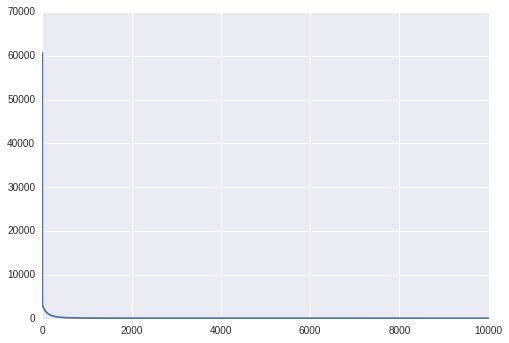

In [46]:
#running gradient descent
cost=[]
lr = 0.000000000999

for i in range(0,10000):
    yhat=X_train.dot(weights)
    residue = (yhat-Y_train)
    weights = weights - lr*(X_train.T.dot(residue))
    cost.append((residue.dot(residue))/N)
    
plt.plot(cost)
plt.show()


In [47]:
r2 = get_r2(yhat,Y_train)
print("r2 for the training data is ")
r2

r2 for the training data is 


0.58995704195619014

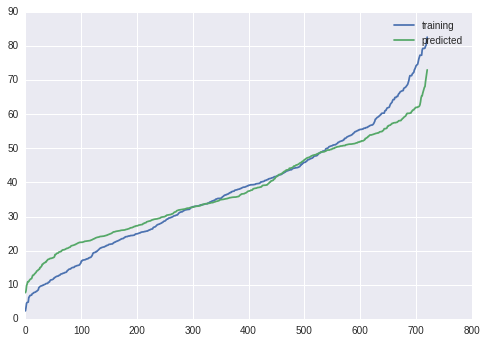

In [48]:
plt.plot(sorted(Y_train),label="training")
plt.plot(sorted(yhat),label="predicted")
plt.legend()
plt.show()

Working on test data now 

In [49]:
Y_predicted_test = X_test.dot(weights)
r2 = get_r2(Y_predicted_test,Y_test)
print("r2 for the test data is ")
r2

r2 for the test data is 


0.56059466963046145

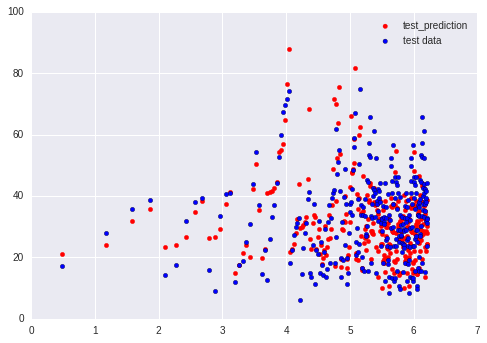

In [50]:
x_in =np.linspace(0,500,309)
plt.scatter(np.log(x_in),Y_predicted_test,label="test_prediction",color="red")
plt.scatter(np.log(x_in),Y_test,label="test data")
plt.legend()
plt.show()